In [2]:
import numpy as np
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

## Phonon dispersion 

This exercise builds on the knolwdge acquired in exercises 8 and 11. Specifically, the computational tools developed for the electronic bandstructure are used to study the vibrational modes of an inifitie chain of atoms. Referring to the Hamiltonian derived in exercise 11, we note that the phononic disperion is solved by the same mathematics presented in exercise 11, except that the eigenvalues correspond to the squared value of the harmonic frequencies $\omega^2$. Hence, the $\omega(E)$ relation is obtained by taking the square root of the eigenvalues of the function **bands** of exercise 11 and copied in the cell below.

In [3]:
def bands(h,t,K):
    '''
    input:
        h = [\phi_0]_nn
        t = [\phi_1]_mnn 
    variables:
    
    '''
    kpts = np.linspace(-K/2,K/2,300)
    E = np.zeros((len(kpts),len(h)))
    R = [1,0,0]
    for k, kpt in enumerate(kpts):
        c_k  = np.exp(1j*2*np.pi*np.dot(R,[kpt,0,0]))
        h_k = h + np.sum(c_k*t,axis=0) + np.conj(c_k)*np.sum(np.swapaxes(t,1,2),axis=0)
        E[k] = np.linalg.eigvalsh(h_k)
    return kpts,E

In [4]:
def make_ht(e,tau):
    dim = e.ndim
    if dim>0:
        dim = len(e)
        h = np.zeros((dim,dim),complex)
        t = np.zeros((dim,dim),complex)
        h.flat[::dim+1]=e
        h.flat[1::dim+1]=tau[0]
        h.flat[dim::dim+1]=np.conj(tau[0])
        t[-1,0]=tau[1]
    else:
        h = np.array(e).reshape(1,1)
        t = np.array(tau).reshape(1,1)
    return h,np.expand_dims(t,0)

In [5]:
def visualize(ax,h,t,replica=5):
    
    import matplotlib.cm as cm
    colors = cm.hot(np.diag(h).real)
    colors = np.tile(colors,(replica,1))
    
    dim   = len(h)
    if dim>1:
        uc     = np.arange(dim)*1/abs(h[0,1].real)
        colors = cm.hot(np.diag(h).real)
        colors = np.tile(colors,(replica,1))
        a      = 1/abs(t[0,-1,0].real)+1/abs(h[0,1].real)
        atoms  = [uc[i]+(j*a) for j in range(replica) for i in range(dim)]
    else:
        uc    = 0
        a     = 1/abs(t[0,-1,0].real)
        atoms = [uc+(j*a) for j in range(replica)]
    rect = Rectangle((-1/abs(2*t[0,-1,0].real),-0.25),a,0.5,
             linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    ax.set_ylim((-1,1))
    ax.scatter(atoms,np.zeros(dim*5),100,c=colors)

In [6]:
w1=0.1
w2=np.sqrt(1.1)*w1
tau = np.array((-w1**2,-w2**2))
e   = np.array((w1**2+w2**2,w1**2+w2**2))
h, t = make_ht(e,tau)
kpts,E = bands(h,t,1)

## ACUSTIC AND OPTICAL PHONONS

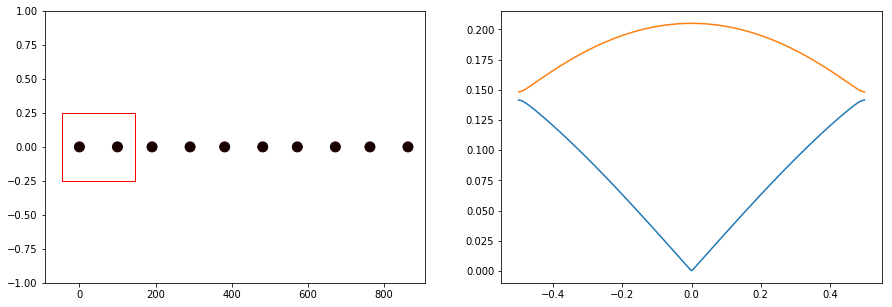

In [7]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
visualize(axs[0],h,t)
axs[1].plot(kpts,np.sqrt(E))